Importing the Dependencies

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [12]:
fileScore = pd.read_csv('FA23.csv')
fileScore.head()

,No.,Computer_Project,Assignment,Quiz,Final
0,1,2.5,8.4,4.8,5.2
1,2,10.0,9.2,7.3,5.8
2,3,10.0,7.7,5.2,6.2
3,4,6.5,7.4,4.1,4.2
4,5,1.0,6.4,5.6,2.8


In [13]:
fileScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   No.               299 non-null    int64  
 1   Computer_Project  299 non-null    float64
 2   Assignment        299 non-null    float64
 3   Quiz              299 non-null    float64
 4   Final             299 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


Draw a scatter plot to find the points that gain most between quiz and final_exam

In [14]:
x = fileScore['Quiz']
y = fileScore['Final']
print(x)
print(y)

0      4.8
1      7.3
2      5.2
3      4.1
4      5.6
      ... 
294    7.0
295    7.3
296    5.3
297    6.0
298    6.0
Name: Quiz, Length: 299, dtype: float64
0      5.2
1      5.8
2      6.2
3      4.2
4      2.8
      ... 
294    4.6
295    4.6
296    2.8
297    6.6
298    4.8
Name: Final, Length: 299, dtype: float64


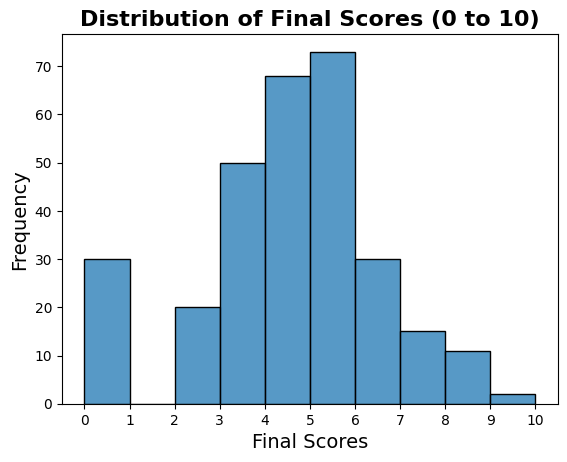

In [32]:
# Vẽ biểu đồ phân phối của 'Final' với các bin cách nhau 1 từ 0 đến 10
bins = np.arange(0, 11, 1)
sns.histplot(fileScore['Final'], bins=bins, kde=False)
plt.title('Distribution of Final Scores (0 to 10)', fontsize=16, fontweight='bold')
plt.xlabel('Final Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bins)
plt.show()

# Phân nhóm dữ liệu theo khoảng điểm từ 0 đến 10


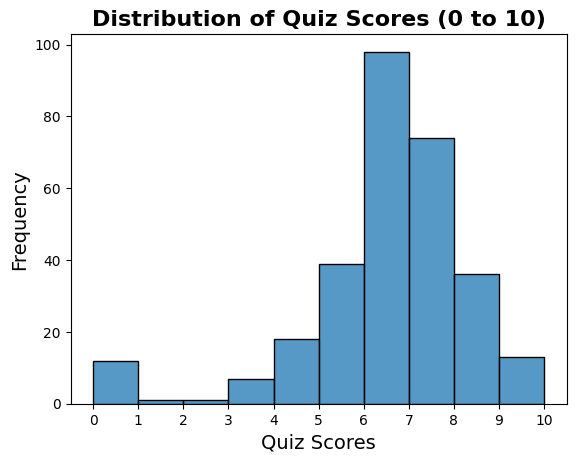

In [33]:
bins = np.arange(0, 11, 1)
sns.histplot(fileScore['Quiz'], bins=bins, kde=False)
plt.title('Distribution of Quiz Scores (0 to 10)', fontsize=16, fontweight='bold')
plt.xlabel('Quiz Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bins)
plt.show()

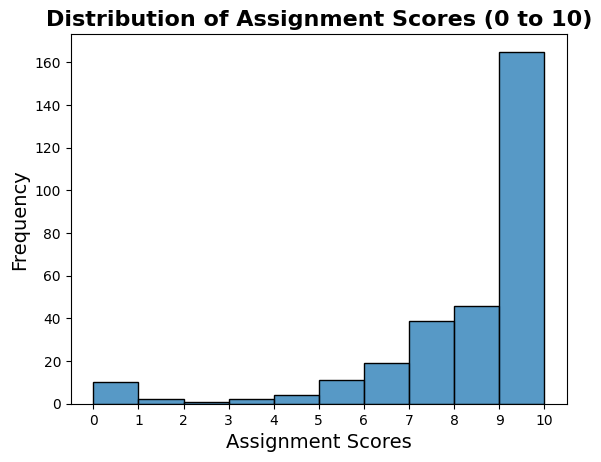

In [34]:
bins = np.arange(0, 11, 1)
sns.histplot(fileScore['Assignment'], bins=bins, kde=False)
plt.title('Distribution of Assignment Scores (0 to 10)', fontsize=16, fontweight='bold')
plt.xlabel('Assignment Scores', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(bins)
plt.show()

In [18]:
fileScore.Quiz.value_counts()

Quiz
6.7     31
7.0     22
6.3     20
6.0     20
7.7     16
7.3     13
0.0     12
5.7     12
8.0     11
8.7      8
8.3      8
5.3      7
5.0      6
6.2      6
6.8      5
9.0      5
4.7      5
6.9      5
7.2      5
9.3      5
5.8      4
7.6      4
8.2      4
7.8      4
7.5      4
6.4      4
4.0      3
3.7      3
6.6      3
4.3      3
3.9      3
5.2      3
6.1      3
4.8      2
5.4      2
8.1      2
7.1      2
8.5      2
7.4      2
5.5      2
4.4      2
7.9      2
5.6      2
1.2      1
10.0     1
8.6      1
5.9      1
4.5      1
6.5      1
3.8      1
9.5      1
4.9      1
9.2      1
4.1      1
2.7      1
Name: count, dtype: int64

In [19]:
fileScore.Assignment.value_counts()

Assignment
10.0    108
9.5      19
9.0      12
0.0      10
8.4      10
8.6       7
9.8       7
7.4       6
8.5       6
7.5       6
8.7       6
7.9       6
9.3       6
9.7       5
7.7       5
8.0       5
8.1       4
7.0       4
8.3       3
9.1       3
6.4       3
6.1       3
7.3       3
5.3       3
9.2       3
7.8       3
6.8       3
5.5       3
8.2       3
6.5       2
6.9       2
7.1       2
6.6       2
5.8       2
1.0       2
4.6       2
8.8       2
7.6       2
6.7       2
7.2       2
5.7       2
9.4       1
6.0       1
2.0       1
3.6       1
3.0       1
4.9       1
9.6       1
6.2       1
5.9       1
4.7       1
Name: count, dtype: int64

In [20]:
fileScore.isnull().sum()

No.                 0
Computer_Project    0
Assignment          0
Quiz                0
Final               0
ScoreGroup          0
dtype: int64

<Axes: xlabel='Quiz', ylabel='Final'>

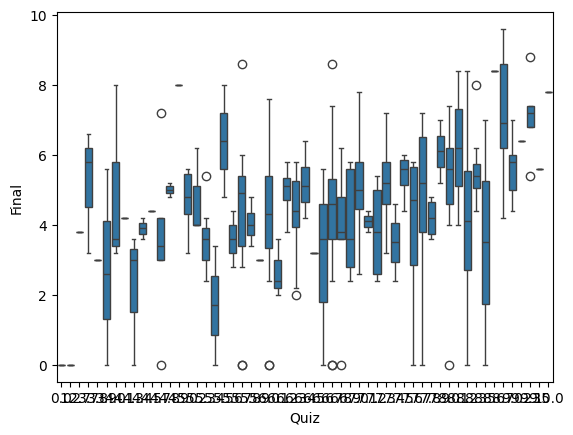

In [21]:
sns.boxplot(x='Quiz',y='Final',data=fileScore)

C:\Users\PC\AppData\Local\Temp\ipykernel_22172\1696581693.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fileScore.Final, bins=10)


<Axes: xlabel='Final', ylabel='Density'>

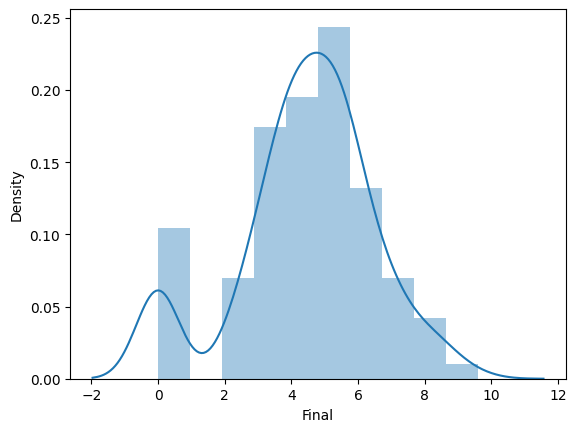

In [22]:
sns.distplot(fileScore.Final, bins=10)

Find the mean, varience and standard deviation of quiz, assignment and final exam of 30 random students.

In [23]:
import random
#Assignments
assignment_counts = fileScore['Assignment'].value_counts()
assignment_grade = [random.choice(assignment_counts.index) for _ in range(30)]
print(assignment_grade)
#Quiz
quiz_counts = fileScore['Quiz'].value_counts()
quiz_grade = [random.choice(quiz_counts.index) for _ in range(30)]
print(quiz_grade)
#Final exam
final_exam_counts = fileScore['Final'].value_counts()
final_exam_grade = [random.choice(final_exam_counts.index) for _ in range(30)]
print(final_exam_grade)

[9.8, 5.5, 8.4, 6.8, 7.5, 9.0, 8.3, 6.0, 9.4, 1.0, 8.4, 5.5, 8.1, 6.4, 7.3, 9.8, 6.0, 8.0, 7.0, 8.3, 6.4, 8.6, 5.8, 7.8, 7.2, 6.6, 8.6, 8.5, 1.0, 9.2]
[7.5, 5.9, 5.2, 7.3, 4.0, 4.5, 8.1, 7.5, 5.6, 8.5, 4.3, 8.3, 7.7, 6.9, 6.0, 8.2, 6.7, 7.2, 4.3, 2.7, 2.7, 6.5, 6.9, 5.6, 3.8, 5.6, 5.4, 5.4, 2.7, 6.9]
[6.8, 5.8, 5.6, 6.8, 7.6, 3.2, 9.6, 4.4, 2.2, 8.0, 9.6, 5.8, 3.4, 8.6, 4.0, 8.8, 2.0, 8.8, 7.6, 3.2, 6.4, 5.8, 7.8, 8.4, 5.2, 7.0, 8.4, 2.4, 5.6, 6.4]


In [24]:
import statistics

In [25]:
#mean
quiz_mean = statistics.mean(quiz_grade)
assignment_mean = statistics.mean(assignment_grade)
final_exam_mean = statistics.mean(final_exam_grade)

In [26]:
#variance
quiz_variance = statistics.variance(quiz_grade)
assignment_variance = statistics.variance(assignment_grade)
final_exam_variance = statistics.variance(final_exam_grade)

In [27]:
#standard deviation
quiz_standard = statistics.stdev(quiz_grade)
assignment_standard = statistics.stdev(assignment_grade)
final_exam_standard = statistics.stdev(final_exam_grade)

In [28]:
# Print the results
print("Sample mean:")
print("Quiz grade:", quiz_mean)
print("Assignment grade:", assignment_mean)
print("Final exam grade:", final_exam_mean)

print("\nSample variance:")
print("Quiz grade:", quiz_variance)
print("Assignment grade:", assignment_variance)
print("Final exam grade:", final_exam_variance)

print("\nSample standard deviation:")
print("Quiz grade:", quiz_standard)
print("Assignment grade:", assignment_standard)
print("Final exam grade:", final_exam_standard)

Sample mean:
Quiz grade: 5.93
Assignment grade: 7.206666666666667
Final exam grade: 6.173333333333334

Sample variance:
Quiz grade: 2.9559655172413795
Assignment grade: 4.405471264367816
Final exam grade: 5.083402298850575

Sample standard deviation:
Quiz grade: 1.7192921558715317
Assignment grade: 2.098921452643671
Final exam grade: 2.2546401705927654


PDF tại x = 7: 0.19118563154348014
CDF tại x = 7: 0.7331438431906091
Giá trị PPF cho xác suất 0.6: 6.365577687134156


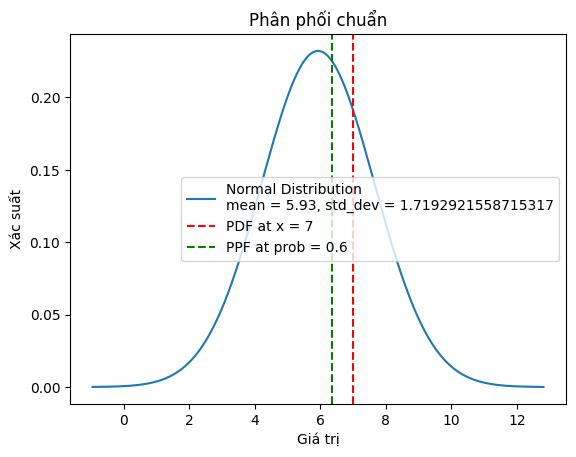

In [37]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt


# Giá trị trung bình và độ lệch chuẩn
mean = quiz_mean
std_dev = quiz_standard


# Tính xác suất tại một điểm cụ thể (PDF)
x_value = 7
pdf_value = stats.norm.pdf(x_value, mean, std_dev)
print(f"PDF tại x = {x_value}: {pdf_value}")


# Tính xác suất tích lũy đến một điểm cụ thể (CDF)
cdf_value = stats.norm.cdf(x_value, mean, std_dev)
print(f"CDF tại x = {x_value}: {cdf_value}")


# Tính giá trị tương ứng với một xác suất cụ thể (PPF)
prob = 0.6
ppf_value = stats.norm.ppf(prob, mean, std_dev)
print(f"Giá trị PPF cho xác suất {prob}: {ppf_value}")


# Vẽ biểu đồ phân phối chuẩn
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)


plt.plot(x, y, label=f'Normal Distribution\nmean = {mean}, std_dev = {std_dev}')
plt.axvline(x=x_value, color='r', linestyle='--', label=f'PDF at x = {x_value}')
plt.axvline(x=ppf_value, color='g', linestyle='--', label=f'PPF at prob = {prob}')
plt.legend()
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.title('Phân phối chuẩn')
plt.show()


Find the smallest sample size of the dataset

PDF tại x = 7: 0.18915099649316958
CDF tại x = 7: 0.46078221881832576
Giá trị PPF cho xác suất 0.6: 7.738422336403525


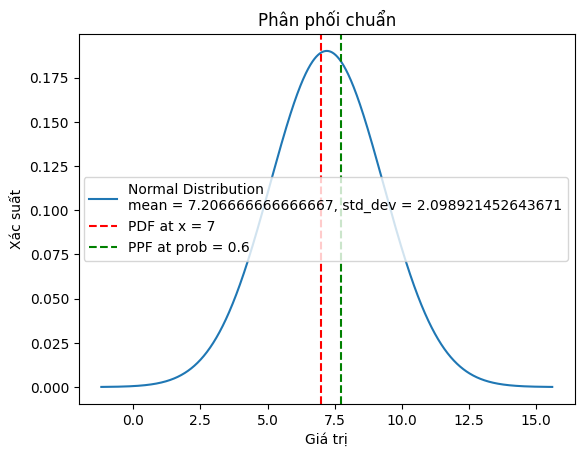

In [38]:
# Giá trị trung bình và độ lệch chuẩn
mean = assignment_mean
std_dev = assignment_standard


# Tính xác suất tại một điểm cụ thể (PDF)
x_value = 7
pdf_value = stats.norm.pdf(x_value, mean, std_dev)
print(f"PDF tại x = {x_value}: {pdf_value}")


# Tính xác suất tích lũy đến một điểm cụ thể (CDF)
cdf_value = stats.norm.cdf(x_value, mean, std_dev)
print(f"CDF tại x = {x_value}: {cdf_value}")


# Tính giá trị tương ứng với một xác suất cụ thể (PPF)
prob = 0.6
ppf_value = stats.norm.ppf(prob, mean, std_dev)
print(f"Giá trị PPF cho xác suất {prob}: {ppf_value}")


# Vẽ biểu đồ phân phối chuẩn
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)


plt.plot(x, y, label=f'Normal Distribution\nmean = {mean}, std_dev = {std_dev}')
plt.axvline(x=x_value, color='r', linestyle='--', label=f'PDF at x = {x_value}')
plt.axvline(x=ppf_value, color='g', linestyle='--', label=f'PPF at prob = {prob}')
plt.legend()
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.title('Phân phối chuẩn')
plt.show()

In [ ]:
# Giá trị trung bình và độ lệch chuẩn
mean = final_exam_mean
std_dev = final_exam_standard


# Tính xác suất tại một điểm cụ thể (PDF)
x_value = 7
pdf_value = stats.norm.pdf(x_value, mean, std_dev)
print(f"PDF tại x = {x_value}: {pdf_value}")


# Tính xác suất tích lũy đến một điểm cụ thể (CDF)
cdf_value = stats.norm.cdf(x_value, mean, std_dev)
print(f"CDF tại x = {x_value}: {cdf_value}")


# Tính giá trị tương ứng với một xác suất cụ thể (PPF)
prob = 0.6
ppf_value = stats.norm.ppf(prob, mean, std_dev)
print(f"Giá trị PPF cho xác suất {prob}: {ppf_value}")


# Vẽ biểu đồ phân phối chuẩn
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = stats.norm.pdf(x, mean, std_dev)


plt.plot(x, y, label=f'Normal Distribution\nmean = {mean}, std_dev = {std_dev}')
plt.axvline(x=x_value, color='r', linestyle='--', label=f'PDF at x = {x_value}')
plt.axvline(x=ppf_value, color='g', linestyle='--', label=f'PPF at prob = {prob}')
plt.legend()
plt.xlabel('Giá trị')
plt.ylabel('Xác suất')
plt.title('Phân phối chuẩn')
plt.show()

In [30]:
Z = 1.96
E = 1.2
n = (Z**2 * (final_exam_standard)**2) / E**2
print(n)

13.561387688378032


Train the Model using Linear Regression model
`final_exam_grade = a + b*quiz_grade`

In [31]:
#Find the correlation of each attribute.
corr = fileScore.corr()
corr.Final.sort_values(ascending=False)

TypeError: float() argument must be a string or a real number, not 'pandas._libs.interval.Interval'

In [ ]:
x = fileScore.drop(['Final','Assignment','Computer_Project'],axis=1)
y = fileScore.Final
print(x)
print(y)

     No.  Quiz
0      1   4.8
1      2   7.3
2      3   5.2
3      4   4.1
4      5   5.6
..   ...   ...
294  295   7.0
295  296   7.3
296  297   5.3
297  298   6.0
298  299   6.0

[299 rows x 2 columns]
0      5.2
1      5.8
2      6.2
3      4.2
4      2.8
      ... 
294    4.6
295    4.6
296    2.8
297    6.6
298    4.8
Name: Final, Length: 299, dtype: float64


In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y,test_size=0.1,random_state=10)
print('Xtrain:',Xtrain.shape)
print('Ytrain:',Ytrain.shape)
print('Xtest:',Xtest.shape)
print('Ytest:',Ytest.shape)

Xtrain: (269, 2)
Ytrain: (269,)
Xtest: (30, 2)
Ytest: (30,)


In [ ]:
model_train = LinearRegression()

In [ ]:
model_train.fit(Xtrain, Ytrain)

LinearRegression()

In [ ]:
y_pred = model_train.predict(Xtest)
print(y_pred)

[2.38354114 0.08957352 4.47257346 4.31278585 6.49202296 5.25653089
 5.69014481 3.7014636  4.81817324 5.84062616 4.72889906 5.17419111
 4.8412577  4.34541539 6.90357364 3.3378525  2.61645287 3.2060413
 4.32386276 4.93281315 4.39158432 4.57655646 5.64592773 5.3711708
 4.7165621  3.82853106 4.56827142 6.03811646 4.41685945 5.60180126]


In [ ]:
print('Coefficient: ',model_train.coef_)
print('Intercept: ',model_train.intercept_)

Coefficient:  [0.00414252 0.63068421]
Intercept:  -0.17969025542228945


Model Evaluation

In [ ]:
#mean squared error
from sklearn import metrics
mse = metrics.mean_squared_error(Ytest, y_pred)
print(mse)

4.846075932535334


In [ ]:
#root mean squared error:
rmse = np.sqrt(metrics.mean_squared_error(Ytest, y_pred))
print(rmse)

2.2013804606508467


In [ ]:
training_data_prediction = model_train.predict(Xtrain)
error_score = metrics.r2_score(Ytrain, training_data_prediction)
print("R squared error: ",error_score)

R squared error:  0.35524911016249694
